ใน Notebook นี้เราจะมาลองเปรียบเทียบ การเทรน Deep Neural Networks ด้วย CPU และ [GPU](https://www.bualabs.com/archives/489/nvidia-smi-gpu-monitoring-tools-gpu-utilization-memory-usage-nvidia-hardware-ep-1/) ดูว่าใช้เวลาต่างกันอย่างไร

# 0. Magic Commands


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [0]:
import fastai
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล

ใช้ชุดข้อมูล Dataset พันธุ์หมาแมว Oxford-IIIT Pet Dataset by O. M. Parkhi et al., 2012

In [0]:
path = untar_data(URLs.PETS)
path_images = path/'images'
filenames = get_image_files(path_images)

# 3. เตรียมข้อมูล

เพื่อความสะดวก เราจะประกาศฟังก์ชัน แล้วไปเรียกสร้างก่อน fit ด้วย CPU และ GPU

In [0]:
batchsize = 32
epoch = 6
np.random.seed(55)
regex_pattern = r'/([^/]+)_\d+.jpg$'

def get_databunch():
    return ImageDataBunch.from_name_re(path_images, 
                                filenames, 
                                regex_pattern, 
                                ds_tfms=get_transforms(), 
                                size=224, bs=batchsize).normalize(imagenet_stats)

# 4. สร้างโมเดล

เพื่อความสะดวก เราจะประกาศฟังก์ชัน แล้วไปเรียกสร้างก่อน fit ด้วย CPU และ GPU

* เคสนี้เราจะใช้โมเดล models.resnet34
* pretrained=False หมายถึง เราจะเริ่มเทรนตั้งแต่ต้น ไม่เอา Weight ที่เคยเทรนกับ ImageNet มาแล้วมาใช้

In [0]:
def get_learner(databunch):
    return cnn_learner(databunch, models.resnet34, 
                      pretrained=True, 
                      metrics=accuracy, callback_fns=ShowGraph)

# 5. เริ่มต้นเทรนโมเดล

เราจะเริ่มเทรนด้วย CPU เปรียบเทียบกับ GPU แล้วจับเวลาที่ใช้ในการเทรน

## 5.1 ลองเทรนด้วย CPU

epoch,train_loss,valid_loss,accuracy,time
0,1.118267,0.379126,0.886333,08:35
1,0.525315,0.288772,0.912720,08:33
2,0.386514,0.286258,0.912720,08:33
3,0.325070,0.243130,0.930988,08:33
4,0.265408,0.218235,0.933018,08:33
5,0.203674,0.210911,0.936401,08:35


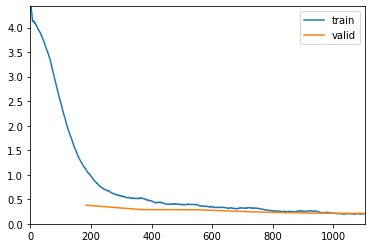

In [0]:
fastai.torch_core.defaults.device = 'cpu'
learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

ใช้เวลาไปเกือบ 1 ชั่วโมง

## 5.2 ลองเทรนด้วย GPU

epoch,train_loss,valid_loss,accuracy,time
0,1.115145,0.351891,0.893099,00:36
1,0.532363,0.285219,0.903248,00:35
2,0.400836,0.251682,0.916103,00:36
3,0.319096,0.211088,0.933018,00:36
4,0.245120,0.196490,0.935047,00:36
5,0.230451,0.195243,0.935047,00:36


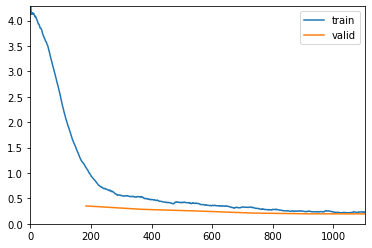

In [0]:
fastai.torch_core.defaults.device = 'cuda'
learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

ใช้เวลาไม่ถึง 5 นาที

# 6. สรุป

เปรียบเทียบ เวลาในการเทรน 6 Epoch ด้วย CPU และ GPU ในตารางดังนี้

| Device     | Time  | Accuracy | Valid_Loss |
|-----------:|-------|---------:|-----------:|
|        CPU | 51:22 |    93.6% |       0.21 |
|        GPU |  3:36 |    93.5% |       0.19 |


สังเกตว่า ผลลัพท์ใกล้เคียงกัน แต่ใช้เวลาต่างกันถึงเกือบ 20 เท่า

# หมายเหตุ

* อันนี้เป็นการทดสอบแบบคร่าว ๆ ให้พอเห็นภาพ มีตัวแปรอีกหลายอย่าง เช่น จำนวน Epoch, โมเดล, รุ่น GPU, CPU, ชนิดของ Disk, Batch Size, Memory, etc.
* CPU ที่ใช้ คือ 
        Machine type: n1-highmem-8 (8 vCPUs, 52 GB memory)
        CPU: platformIntel Skylake

* GPU ที่ใช้ คือ 
        Machine type: n1-highmem-8 (8 vCPUs, 52 GB memory)
        CPU: platformIntel Skylake
        GPUs: 1 x NVIDIA Tesla P4


# Credit

* [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf)
* https://course.fast.ai/videos/?lesson=1
* https://cloud.google.com/compute/all-pricing